# Classification Modeling

In [1]:
import classifiers as clf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

import pickle

### Load Species Data

In [2]:
species = pd.read_pickle("../Data/species.pkl")
species.head()

,Scientific Name,Common Name,Federal Listing Status,Group_Amphibians,Group_Annelid Worms,Group_Arachnids,Group_Birds,Group_Clams,Group_Conifers and Cycads,Group_Corals,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,Accipiter gentilis,Northern goshawk,Not Listed,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Acipenser fulvescens,Lake sturgeon,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Atlantic sturgeon (Gulf subspecies),Threatened,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agarodes alabamensis,[Unnamed] caddisfly,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agrimonia incisa,Incised groovebur,Not Listed,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Set Target and Feature Variables

In [3]:
# Create target and feature variables
y = species['Federal Listing Status']
X = species.drop(['Federal Listing Status', 'Scientific Name', 'Common Name'], axis = 1)

### Create Training and Test Sets

In [4]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# federal listing status
print('Training Data: ' + str(y_train.count()))
print('Endangered:    ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed:    ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened:    ' + str((y_train == 'Threatened').sum() / y_train.count()))

# federal listing status
print('Test Data:     ' + str(y_test.count()))
print('Endangered:    ' + str((y_test == 'Endangered').sum() / y_test.count()))
print('Not Listed:    ' + str((y_test == 'Not Listed').sum() / y_test.count()))
print('Threatened:    ' + str((y_test == 'Threatened').sum() / y_test.count()))

Training Data: 9389
Endangered:    0.16050697624880178
Not Listed:    0.7717541804239003
Threatened:    0.0677388433272979
Test Data:     2348
Endangered:    0.16695059625212946
Not Listed:    0.7640545144804088
Threatened:    0.06899488926746167


### Baseline Classification Model Parameters

In [5]:
# list for all classifiers
classifiers = []

In [6]:
# dummy classifier parameters with defaults
parameters_dummy = dict(strategy=['most_frequent'])

classifiers.append({'Model': 'Dummy',
                    'Classifier': GridSearchCV(DummyClassifier(),
                                               parameters_dummy,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=1)})

# logistic regression parameters with defaults
parameters_log = dict(penalty=['l2'],
                      C=[1e0],
                      fit_intercept=[True],
                      multi_class=['ovr'],
                      solver=['liblinear'])

classifiers.append({'Model': 'Logistic Regression',
                    'Classifier': GridSearchCV(LogisticRegression(),
                                               parameters_log,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# KNN classifier parameters with defaults
parameters_knn = dict(n_neighbors=[5])

classifiers.append({'Model': 'K Nearest Neighbors',
                    'Classifier': GridSearchCV(KNeighborsClassifier(),
                                               parameters_knn,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

In [7]:
classifiers, metrics = clf.fit_predict_metrics(classifiers, X_train, X_test, y_train, y_test)

baseline = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])

baseline['Configuration'] = 'Baseline'
models = baseline.copy()
models

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.4s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remai

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.9s remaining:   16.4s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   11.0s remaining:    7.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   16.8s finished


,Model,Split,Accuracy,Precision,Recall,F1 Score,Configuration
0,Dummy,Train,0.771754,0.595605,0.771754,0.672333,Baseline
1,Dummy,Test,0.764055,0.583779,0.764055,0.661861,Baseline
2,Logistic Regression,Train,0.795292,0.767752,0.795292,0.734234,Baseline
3,Logistic Regression,Test,0.787905,0.722471,0.787905,0.723907,Baseline
4,K Nearest Neighbors,Train,0.771754,0.753352,0.771754,0.746361,Baseline
5,K Nearest Neighbors,Test,0.758092,0.714326,0.758092,0.729903,Baseline


In [8]:
baseline.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

Accuracy           Precision              Recall  \
Split                    Test     Train      Test     Train      Test   
Model                                                                   
K Nearest Neighbors  0.758092  0.771754  0.714326  0.753352  0.758092   
Logistic Regression  0.787905  0.795292  0.722471  0.767752  0.787905   
Dummy                0.764055  0.771754  0.583779  0.595605  0.764055   

                               F1 Score            
Split                   Train      Test     Train  
Model                                              
K Nearest Neighbors  0.771754  0.729903  0.746361  
Logistic Regression  0.795292  0.723907  0.734234  
Dummy                0.771754  0.661861  0.672333

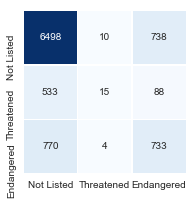

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, classifiers[2]['y_hat_train'], labels=list(y.unique()))
cm

fig, ax = plt.subplots(figsize=(3,3))
sns.heatmap(cm,
            cmap='Blues',cbar=False,
            annot=True,
            fmt="d",
            linewidths=.5,
            xticklabels=list(y.unique()),
            yticklabels=list(y.unique()),square=True)

In [20]:
classifiers[0]['Classifier'].best_estimator_

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [ ]:
# list for all classifiers
classifiers = []

# dummy classifier
classifiers.append({'Model': 'Dummy',
                    'Classifier': DummyClassifier(strategy='most_frequent')})

# logistic regression classifer
classifiers.append({'Model': 'Logistic Regression',
                    'Classifier': LogisticRegression(C=1e12,
                                                     penalty='l1',
                                                     multi_class='ovr',
                                                     solver='liblinear',
                                                     n_jobs=-1)})

# k nearest neighbors classifer
classifiers.append({'Model': 'K Nearest Neighbors',
                    'Classifier': KNeighborsClassifier(n_neighbors=5)})

# decision tree classifer
classifiers.append({'Model': 'Decision Tree',
                    'Classifier': DecisionTreeClassifier(criterion='gini',
                                                         max_depth=9,
                                                         max_features=0.9)})

# random forest classifer
classifiers.append({'Model': 'Random Forest',
                    'Classifier': RandomForestClassifier(n_estimators=100,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=0.6)})

In [ ]:
classifiers, metrics = clf.classify(classifiers, X_train, X_test, y_train, y_test)

baseline = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])
baseline['Configuration'] = 'Baseline'
models = baseline.copy()
models

In [ ]:
baseline.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

### Handling Class Imbalance with SMOTE Oversampling

In [ ]:
# federal listing status
print(y_train.count())
print('Endangered: ' + str((y_train == 'Endangered').sum() / y_train.count()))
print('Not Listed: ' + str((y_train == 'Not Listed').sum() / y_train.count()))
print('Threatened: ' + str((y_train == 'Threatened').sum() / y_train.count()))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train,
              order=y_train.value_counts().index,
              alpha=0.8)

In [ ]:
keys = list(y_train.unique())
values = np.ones((3), dtype=int) * (y_train == 'Not Listed').sum()
sample_ratio = dict(zip(keys, values))
sample_ratio

In [ ]:
species['Federal Listing Status'].unique()

smote = SMOTE(ratio=sample_ratio)
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

# federal listing status
print(len(y_train_smote))
print('Endangered: ' + str((y_train_smote == 'Endangered').sum() / len(y_train_smote)))
print('Not Listed: ' + str((y_train_smote == 'Not Listed').sum() / len(y_train_smote)))
print('Threatened: ' + str((y_train_smote == 'Threatened').sum() / len(y_train_smote)))

# plot class imbalance
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(y_train_smote,
              order=y_train.value_counts().index,
              alpha=0.8)

### Balanced Classification Models

In [ ]:
classifiers, metrics = clf.classify(classifiers, X_train_smote, X_test, y_train_smote, y_test)

balanced = pd.DataFrame(metrics, columns=['Model',
                                          'Split',
                                          'Accuracy',
                                          'Precision',
                                          'Recall',
                                          'F1 Score'])

balanced['Configuration'] = 'Balanced'
models = models.append(balanced, ignore_index=True)

In [ ]:
models.sort_values(by='F1 Score', ascending=False)

In [ ]:
balanced.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

### Tuned and Balanced Grid Search Classification Models

In [ ]:
# list for all grid searches
grid_searches = []

In [ ]:
# logistic regression parameters
parameters_log = dict(penalty=['l1', 'l2'],
                      C=[1e-2, 1e0, 1e2, 1e6, 1e12],
                      fit_intercept=[True, False],
                      multi_class=['ovr'],
                      solver=['liblinear'])

grid_searches.append({'Model': 'Logistic Regression',
                    'Classifier': GridSearchCV(LogisticRegression(),
                                               parameters_log,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# k nearest neighbors parameters
parameters_knn = dict(n_neighbors=[5,11],
                      weights=['uniform', 'distance'],
                      algorithm=['ball_tree','kd_tree'],
                      leaf_size=[100,200])

grid_searches.append({'Model': 'K Nearest Neighbors',
                    'Classifier': GridSearchCV(KNeighborsClassifier(),
                                               parameters_knn,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# decision tree parameters
parameters_tree = dict(criterion=['gini','entropy'],
                       max_depth=[6,8],
                       min_samples_leaf=[20,50,100],
                       max_features=[20,30,40],
                       min_impurity_decrease=[0.01,0.03,0.05])

grid_searches.append({'Model': 'Decision Tree',
                    'Classifier': GridSearchCV(DecisionTreeClassifier(),
                                               parameters_tree,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

# random forest parameters
parameters_forest = dict(n_estimators=[100,200,300],
                         max_depth=[2,3,4],
                         min_samples_leaf=[100,200],
                         max_features=[10,20],
                         min_impurity_decrease=[0.01,0.03,0.05])

grid_searches.append({'Model': 'Random Forest',
                    'Classifier': GridSearchCV(RandomForestClassifier(),
                                               parameters_forest,
                                               cv=5,
                                               scoring='f1_weighted',
                                               verbose=10,
                                               n_jobs=-1)})

In [ ]:
grid_searches, metrics = clf.grid_search(grid_searches, X_train_smote, X_test, y_train_smote, y_test, X.columns)

tuned = pd.DataFrame(metrics, columns=['Model',
                                       'Split',
                                       'Accuracy',
                                       'Precision',
                                       'Recall',
                                       'F1 Score'])

tuned['Configuration'] = 'Balanced and Tuned'
models = models.append(tuned, ignore_index=True, sort=False)

In [ ]:
models.sort_values(by='F1 Score', ascending=False)

In [ ]:
tuned.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

In [ ]:
balanced.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

In [ ]:
baseline.pivot(index='Model', columns='Split').drop(
    'Configuration', axis=1).sort_values(by=('F1 Score','Train'), ascending=False)

### Data Loading

In [ ]:
models.to_pickle("../Data/models.pkl")
baseline.to_pickle("../Data/baseline.pkl")
balanced.to_pickle("../Data/balanced.pkl")
tuned.to_pickle("../Data/tuned.pkl")

In [ ]:
pickle.dump(grid_searches, open( "../Data/grid_searches.pkl", "wb" ))
pickle.dump(metrics, open( "../Data/metrics.pkl", "wb" ))